In [ ]:
Observations:
1. Rural people pay higher fare, but the number of rides is less
2. About 60% of total fare comes from Urban Cities
3. About 70% of rides comes from Urban Cities 

In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
df = pd.merge(ride_data, city_data, on="city", how='left')
# Display the data table for preview
df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

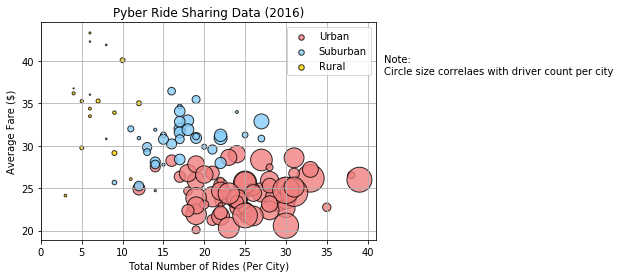

In [11]:


# Create a legend

# Incorporate a text label regarding circle size

# Save Figure
# plot_df = df.copy()
# new_df = pd.DataFrame({'Total rides' : df.groupby("city").size(),
#                       "Average Fare" : df.groupby("city")["fare"].mean(),
#                        "Driver per City" : df.groupby("city")['driver_count'].sum(),
#                       }).reset_index()

# plot_df.reset_index(drop=True)
# new_df["Type"] = plot_df["type"]
# new_df = new_df.set_index("city")
# new_df

# new_df.plot(kind="scatter", x='Total rides', y='Average Fare', s=new_df["Driver per City"]/5)

# Obtain the x and y coordinates for each of the three city types
city_urban = df.loc[df['type'] == 'Urban']
city_suburban = df.loc[df['type'] == 'Suburban']
city_rural = df.loc[df['type'] == 'Rural']

max_total_rides_per_city = df.groupby("city")["ride_id"].count().max()
total_rides_urban = df.loc[df['type'] == "Urban"].groupby("city").count()["ride_id"]
total_rides_suburban = df.loc[df['type'] == "Suburban"].groupby("city").count()["ride_id"]
total_rides_rural = df.loc[df['type'] == 'Rural'].groupby("city").count()["ride_id"]

avg_fare_urban = df.loc[df['type'] == 'Urban'].groupby("city").mean()["fare"]
avg_fare_suburban = df.loc[df['type'] == 'Suburban'].groupby("city").mean()["fare"]
avg_fare_rural = df.loc[df['type'] == 'Rural'].groupby("city").mean()["fare"]

driver_per_city = df.groupby("city")['driver_count'].sum()
driver_per_city_urban = df.loc[df['type'] == 'Urban'].groupby("city").sum()['driver_count']
driver_per_city_suburban = df.loc[df['type'] == 'Suburban'].groupby("city").sum()['driver_count']
driver_per_city_rural = df.loc[df['type'] == 'Rural'].groupby("city").sum()['driver_count']

plt.scatter(total_rides_urban, avg_fare_urban, s=driver_per_city_urban/3, c="lightcoral", 
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Urban")
plt.scatter(total_rides_suburban, avg_fare_suburban, s=driver_per_city_suburban/3, c="lightskyblue", 
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Suburban")
plt.scatter(total_rides_rural, avg_fare_rural, s=driver_per_city_rural/3, c="gold", 
            edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.xlim(0,41)
plt.grid(True)

# Create a legend
lgnd = plt.legend(loc="best")

#Setting a fixed size for points in legend
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
textstr = "Note: \nCircle size correlaes with driver count per city"
plt.gcf().text(0.92, 0.7, textstr, fontsize=10)

# Save Figure
plt.savefig("RideSharingScatterPlot.png", bbox_inches = 'tight')


In [17]:
# Show plot
plt.show()

## Total Fares by City Type

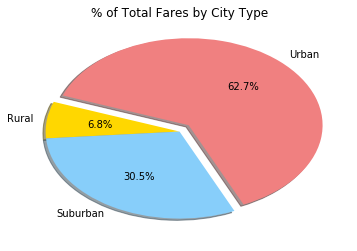

In [3]:
# Calculate Type Percents
city_type_list = df["type"].unique()
city_types = df.groupby("type")
driver_count = city_types["driver_count"].sum()
city_groups = df.groupby(["type", "city"])
total_rides = city_groups["ride_id"].count()
total_fare = city_types["fare"].sum()

# Build Pie Chart
explode=(0,0,0.1)
colors = ["gold","lightskyblue","lightcoral",]
fare_pie = total_fare.plot(kind="pie", 
                           y=city_type_list, 
                           autopct="%1.1f%%", 
                           explode=explode, 
                           colors=colors,
                           startangle = 160,
                           shadow = True,
                           title=("% of Total Fares by City Type"))
plt.xlabel("")
plt.ylabel("")
# Save Figure
plt.savefig("Total Fares by City Type.png")






In [376]:
# Show Figure


## Total Rides by City Type

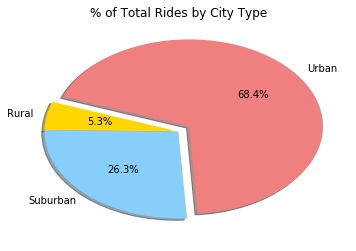

In [4]:
# Calculate Ride Percents

city_type_list = df["type"].unique()
city_types = df.groupby("type")
driver_count = city_types["driver_count"].sum()
city_groups = df.groupby(["type", "city"])
total_rides = city_types["ride_id"].count()
total_fare = city_types["fare"].sum()

# Build Pie Chart
explode=(0,0,0.1)
colors = ["gold","lightskyblue","lightcoral",]
fare_pie = total_rides.plot(kind="pie", 
                            y=city_type_list, 
                            autopct="%1.1f%%", 
                            explode=explode, 
                            colors=colors,
                            startangle = 160,
                            shadow = True,
                            title=("% of Total Rides by City Type"))

plt.xlabel("")
plt.ylabel("")
# Save Figure
plt.savefig("Total Rides by City Type.png")

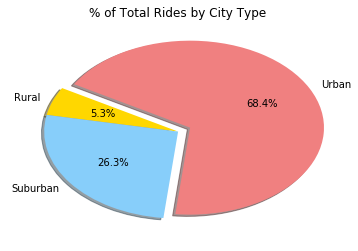

In [5]:
# Show Figure


## Total Drivers by City Type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

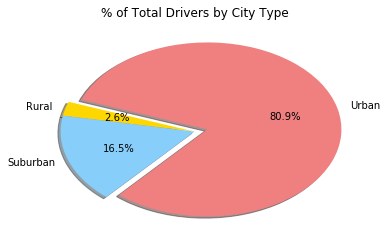

In [5]:
# Calculate Driver Percents

city_type_list = city_data["type"].unique()
city_types = city_data.groupby("type")
driver_count = city_types["driver_count"].sum()

# Build Pie Charts
explode=(0,0,0.1)
colors = ["gold","lightskyblue","lightcoral",]
fare_pie = driver_count.plot(kind="pie", 
                             y=city_type_list, 
                             autopct="%1.1f%%", 
                             explode=explode, 
                             colors=colors,
                             startangle = 160,
                             shadow = True,
                             title=("% of Total Drivers by City Type"))
plt.xlabel("")
plt.ylabel("")

# Save Figure
plt.savefig("Total Drivers by City Type.png")
driver_count

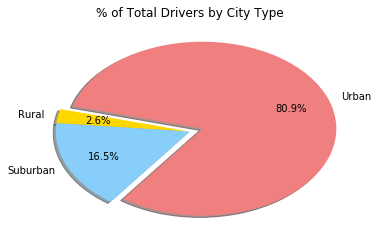

In [6]:
# Show Figure
plt.show()